In [1]:
import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import statsmodels.api as sm

import statsmodels as sx

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [2]:
# JAKARTA
mobility = pd.read_csv('data/jakarta/mobility_maret_january.csv')
weather = pd.read_csv('data/jakarta/weather_maret_january.csv')
case = pd.read_csv('data/jakarta/case_maret_january.csv')

In [3]:
print(mobility.shape)
mobility.head()

(306, 7)


,date,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
0,2020-03-18,-22,-3,-28,-32,-19,11
1,2020-03-19,-28,-12,-33,-38,-21,12
2,2020-03-20,-30,-11,-32,-42,-23,15
3,2020-03-21,-35,-5,-38,-40,-10,11
4,2020-03-22,-49,-22,-59,-49,-12,14


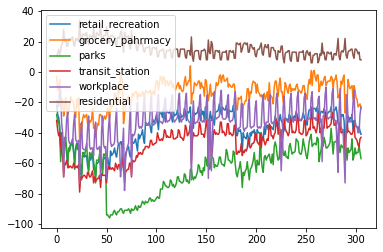

In [4]:
mobility.plot()
plt.show()

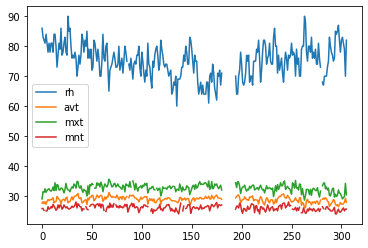

In [5]:
weather.plot()
plt.show()

In [6]:
print(case.shape)
case.head()

(306, 2)


,date,case
0,2020-03-18,158
1,2020-03-19,210
2,2020-03-20,215
3,2020-03-21,267
4,2020-03-22,307


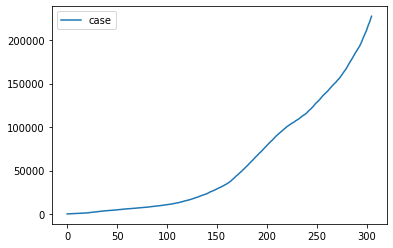

In [7]:
case.plot()
plt.show()

In [8]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

,date,rh,avt,mxt,mnt
0,2020-03-18,86.0,27.6,29.0,25.800000
1,2020-03-19,83.0,28.1,31.4,25.800000
2,2020-03-20,82.0,27.4,31.2,25.200000
3,2020-03-21,81.0,28.1,32.4,26.132857
4,2020-03-22,84.0,27.2,31.2,25.000000


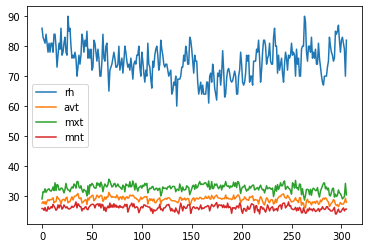

In [9]:
new_weather.plot()
plt.show()
#print(new_weather)

In [10]:
case.date = pd.to_datetime(case.date)

date = case['date'].values

case.set_index('date', inplace=True)

new_weather.date = pd.to_datetime(new_weather.date)
new_weather.set_index('date', inplace=True)

mobility.date = pd.to_datetime(mobility.date)
mobility.set_index('date', inplace=True)

In [11]:
mobility.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-18,-22,-3,-28,-32,-19,11
2020-03-19,-28,-12,-33,-38,-21,12
2020-03-20,-30,-11,-32,-42,-23,15
2020-03-21,-35,-5,-38,-40,-10,11
2020-03-22,-49,-22,-59,-49,-12,14


In [12]:
df = pd.merge(case, new_weather, left_index=True, right_index=True)
df = pd.merge(df, mobility, left_index=True, right_index=True)
df.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-18,158,86.0,27.6,29.0,25.800000,-22,-3,-28,-32,-19,11
2020-03-19,210,83.0,28.1,31.4,25.800000,-28,-12,-33,-38,-21,12
2020-03-20,215,82.0,27.4,31.2,25.200000,-30,-11,-32,-42,-23,15
2020-03-21,267,81.0,28.1,32.4,26.132857,-35,-5,-38,-40,-10,11
2020-03-22,307,84.0,27.2,31.2,25.000000,-49,-22,-59,-49,-12,14


In [13]:

train_date = date[:int(len(df)*0.8)]
train_df = df[:int(len(df)*0.8)].copy()

test_date = date[int(len(df)*0.8):]
test_df = df[int(len(df)*0.8):].copy()

print(train_df.shape, test_df.shape)

(244, 11) (62, 11)


In [14]:
nobs = 62
train, test = df[0:-nobs], df[-nobs:]

# Check size
print(train.shape)  # (119, 8)
print(test.shape)  # (4, 8)

(244, 11)
(62, 11)


In [15]:
# Fungsi untuk ploting

def plot_sensor(name):
    
    plt.figure(figsize=(16,4))

    plt.plot(train_date, train_df[name], label='train')
    plt.plot(test_date, test_df[name], label='test')
    plt.ylabel(name); plt.legend()
    plt.show()
    
def plot_autocor(name, df):
    
    plt.figure(figsize=(16,4))
    
    timeLags = np.arange(1,100*24)
    plt.plot([df[name].autocorr(dt) for dt in timeLags])
    plt.title(name); plt.ylabel('autocorr'); plt.xlabel('time lags')
    plt.show()

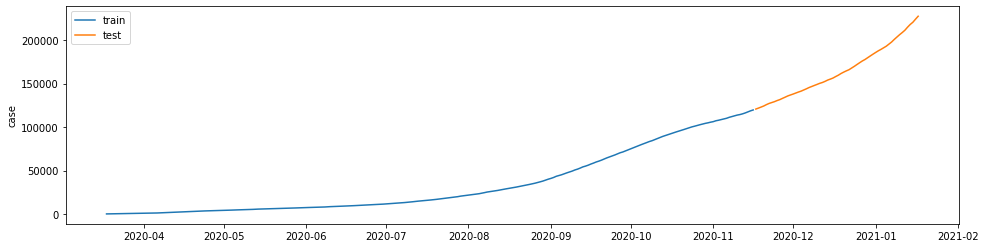

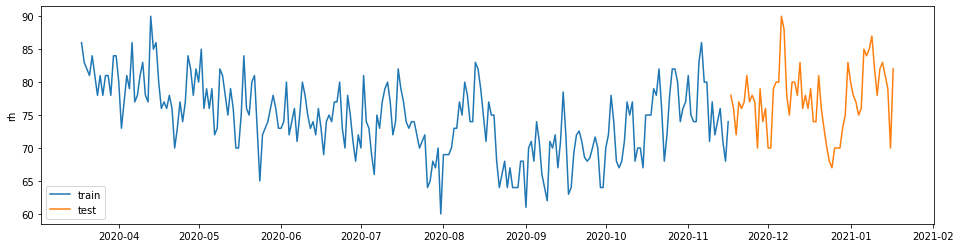

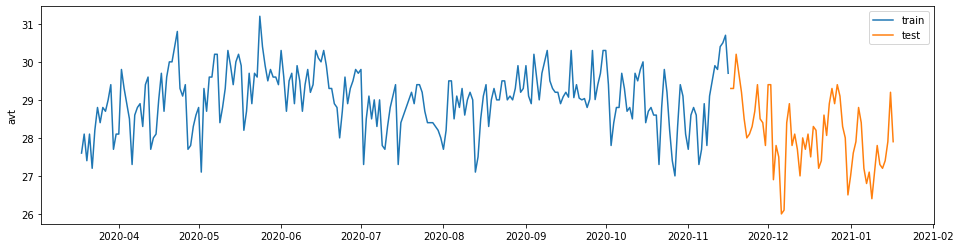

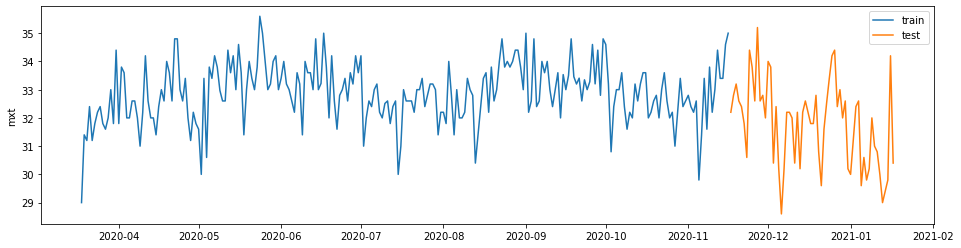

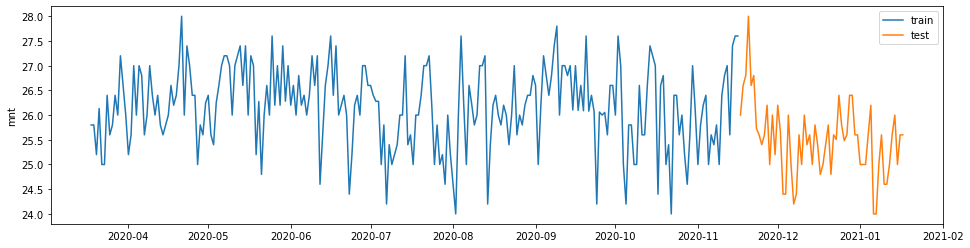

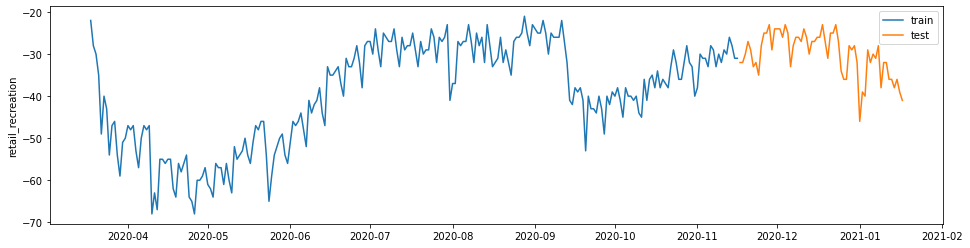

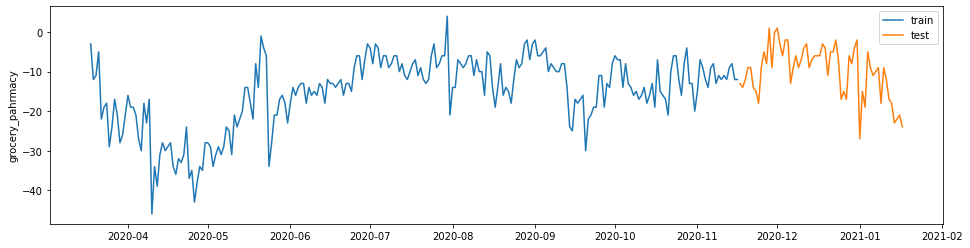

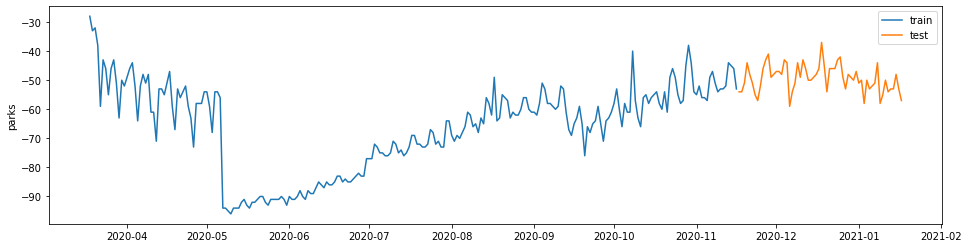

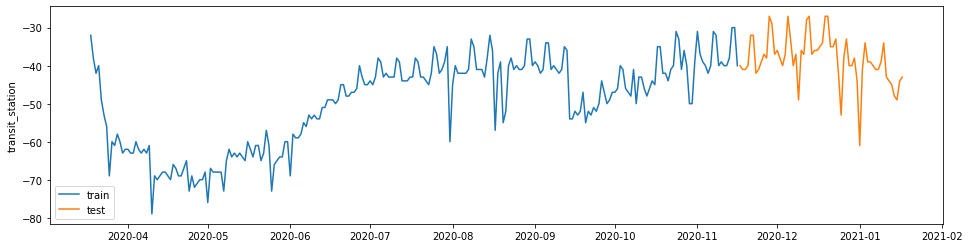

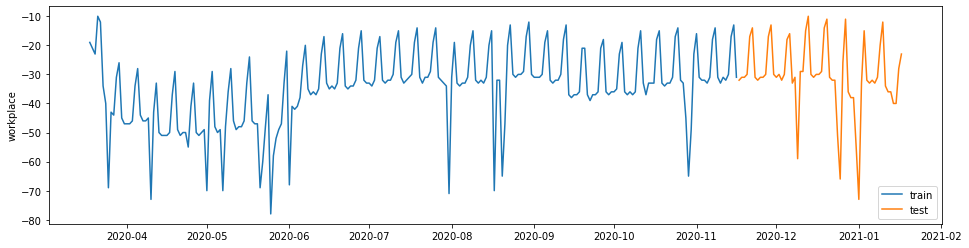

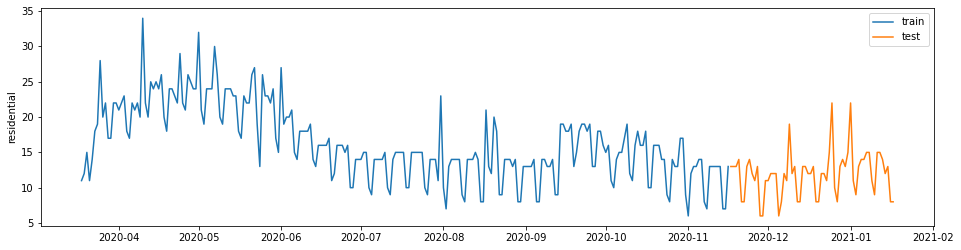

In [16]:
# PLot data train & test

for col in df.columns:
    plot_sensor(col)

In [17]:
print(test)

              case    rh   avt   mxt   mnt  retail_recreation  \
date                                                            
2020-11-17  120670  78.0  29.3  32.2  26.0                -32   
2020-11-18  121818  76.0  29.3  32.8  26.6                -32   
2020-11-19  123003  72.0  30.2  33.2  26.8                -30   
2020-11-20  124243  77.0  29.7  32.6  28.0                -27   
2020-11-21  125822  76.0  29.2  32.4  26.6                -29   
...            ...   ...   ...   ...   ...                ...   
2021-01-13  214728  83.0  27.2  29.0  25.6                -36   
2021-01-14  217893  81.0  27.4  29.4  26.0                -38   
2021-01-15  220434  79.0  27.9  29.8  25.0                -36   
2021-01-16  223970  70.0  29.2  34.2  25.6                -39   
2021-01-17  227365  82.0  27.9  30.4  25.6                -41   

            grocery_pahrmacy  parks  transit_station  workplace  residential  
date                                                                       

In [18]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
case   ::  391.41    > 263.2603  =>   True
rh     ::  289.21    > 219.4051  =>   True
avt    ::  211.41    > 179.5199  =>   True
mxt    ::  144.92    > 143.6691  =>   True
mnt    ::  105.19    > 111.7797  =>   False
retail_recreation ::  68.95     > 83.9383   =>   False
grocery_pahrmacy ::  37.77     > 60.0627   =>   False
parks  ::  21.62     > 40.1749   =>   False
transit_station ::  10.53     > 24.2761   =>   False
workplace ::  2.2       > 12.3212   =>   False
residential ::  0.65      > 4.1296    =>   False


In [19]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [20]:
# ADF test untuk setiap column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0729
 No. Lags Chosen       = 5
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.9642. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "rh" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4096
 No. Lags Chosen       = 4
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0106. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "avt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signi

In [21]:
#mod = sm.tsa.VARMAX(test[['case', 'rh']], order=(12,1))

mod = sx.tsa.statespace.varmax.VARMAX(test[['case', 'avt']], order=(6,2))

res = mod.fit(maxiter=100, disp=False)
print(res.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                           Statespace Model Results                           
Dep. Variable:        ['case', 'avt']   No. Observations:                   62
Model:                     VARMA(6,2)   Log Likelihood               -4853.105
                          + intercept   AIC                           9780.209
Date:                Tue, 20 Apr 2021   BIC                           9858.913
Time:                        10:24:32   HQIC                          9811.110
Sample:                    11-17-2020                                         
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):           43.34, 46.37   Jarque-Bera (JB):           0.52, 2.45
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.77, 0.29
Heteroskedasticity (H):         2.58, 0.63   Skew:                       0.11, 0.26
Prob(H) (two-sided):            0.03,

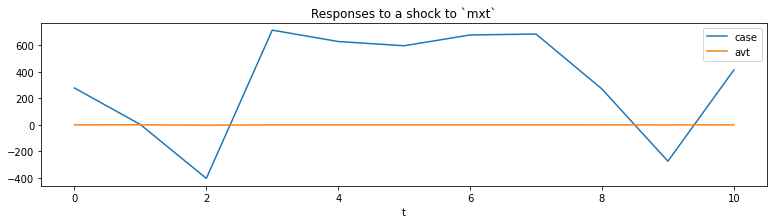

In [22]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `mxt`');

In [23]:
# Import libraries
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# Generate a sample dataset with correlated variables
data = train

#test[['case', 'avt']], order=(6,2)

# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(maxiter=1000, disp=False)
# make prediction
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                                                                    Statespace Model Results                                                                                    
Dep. Variable:     ['case', 'rh', 'avt', 'mxt', 'mnt', 'retail_recreation', 'grocery_pahrmacy', 'parks', 'transit_station', 'workplace', 'residential']   No. Observations:                  244
Model:                                                                                                                                       VARMA(1,1)   Log Likelihood               -8162.898
                                                                                                                                            + intercept   AIC                          16963.795
Date:                                                                                                                                  Tue, 20 Apr 2021   BIC                          18079.392
Time:                              

In [24]:
yhat = model_fit.forecast(exog=data)
print(yhat)

                     case         rh       avt        mxt        mnt  \
2020-11-17  119165.519474  70.050422  29.73537  33.696218  26.859212   

            retail_recreation  grocery_pahrmacy      parks  transit_station  \
2020-11-17         -32.553655         -8.990237 -52.394225       -39.727409   

            workplace  residential  
2020-11-17 -31.468054     13.65915  
